In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
sns.set_style('whitegrid')
%matplotlib inline

In [20]:
house = pd.read_csv('EdmontonHseData.csv')

In [21]:
#Here, we make a new df called 'coord', and only have latitude and longitude coordinates
coord = house[['Latitude','Longitude']]

In [22]:
coord

,Latitude,Longitude
0,53.540949,-113.533619
1,53.519952,-113.419429
2,53.437892,-113.525607
3,53.449953,-113.565005
4,53.539175,-113.520775
5,53.610727,-113.376475
6,53.630884,-113.450859
7,53.468978,-113.389710
8,53.535050,-113.577421
9,53.450937,-113.591627


In [23]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

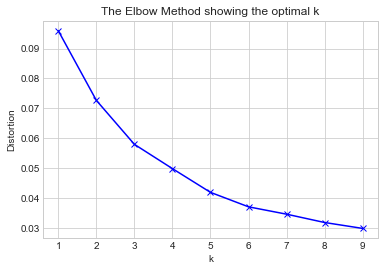

In [24]:
#this is an elbow method using sse to find where the most optimal k cluster # is. It seems like 5, although we used 6
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(coord)
    kmeanModel.fit(coord)
    distortions.append(sum(np.min(cdist(coord, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / coord.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [25]:
#Choose the number of clusters we want
kmeans = KMeans(n_clusters=6)

In [26]:
kmeans.fit(coord)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
#examines the centroid coordinates after ML is done. 
kmeans.cluster_centers_

array([[  53.53279598, -113.50308703],
       [  53.45405462, -113.42058458],
       [  53.59663841, -113.42127054],
       [  53.60970656, -113.52048005],
       [  53.51865052, -113.63856796],
       [  53.44080622, -113.55831275]])

In [28]:
#These are the labels for each point. Here, we are adding the labels to the data set, and calling the column clusters
coord['cluster'] = kmeans.labels_

C:\Users\Jeff\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
coord

,Latitude,Longitude,cluster
0,53.540949,-113.533619,0
1,53.519952,-113.419429,1
2,53.437892,-113.525607,5
3,53.449953,-113.565005,5
4,53.539175,-113.520775,0
5,53.610727,-113.376475,2
6,53.630884,-113.450859,2
7,53.468978,-113.389710,1
8,53.535050,-113.577421,4
9,53.450937,-113.591627,5


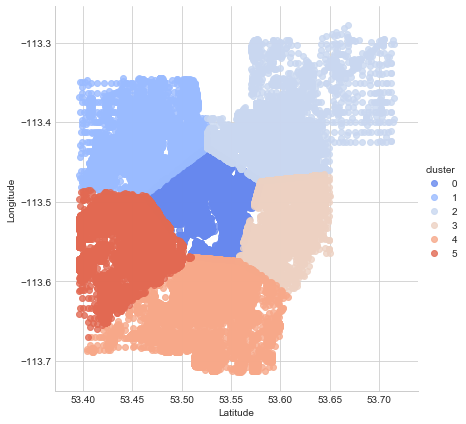

In [30]:
#creates a graph for the coordinates, by cluster
sns.set_style('whitegrid')
sns.lmplot('Latitude','Longitude',data=coord, hue='cluster',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)